# Tensor Product

In this section, we will first define tensor product in the scope of ``e3nn``, introduce some rules tensor products must abide by, and visualize how each tensor product pathway can be parameterized by weights, which allows for the learning process to happen for a equivariant-NN.

Tensor product is the equivariant multiplication operation of two representations denoted by:

$$
x\otimes y
$$

In all cases, tensor products must satisfy the two conditions of being: 1). ``bilinear`` and 2). ``equivariant``. Depending on the irrep type of $x$ and $y$ this operation can take different forms. For instance if $x$ and $y$ are two scalars it will simply be the product $xy$ up to a multiplicative constant. If $x$ is a scalar and $y$ is a vector, $x\otimes y$ will be the vector made of the product of $x$ with $y$.

In the case of two vectors, $x\otimes y$ is an element of $\mathcal{R}^9$ or a rank-2 tensor. As shown in the ``irreducible representations`` section, via a change of basis $x\otimes y$ can be decomposed into irrep of the form "1x0e + 1x1o + 1x2o" (a scalar, a pseudovector, and a trace-less symmetric matrix). Thus this tensor product can be written as:

$$
1o\otimes 1o \to 0e + 1e + 2e
$$

Notice that there are three branching operations in this tensor product that are each bilinear and equivariant. A e3nn implementation of this tensor product and a visuallization of this branching operation is given below:

In [11]:
import e3nn
import matplotlib.pyplot as plt

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

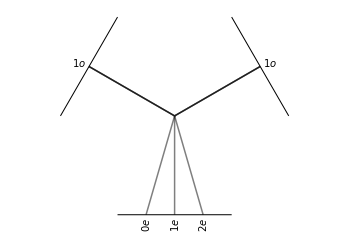

In [12]:
# Here is the e3nn way of computing: "3 x 3 = 1 + 3 + 5"

tp = e3nn.o3.FullTensorProduct("1o", "1o")

tp.visualize()

When computing the tensor product of representations of higher order $l$ we can obtain more independent operations. These independent operations are called ``paths``. Each path from the tensor product of an irrep ($l_1$, $p_1$) with an irrep ($l_2$ , $p_2$) will yield an irrep of order $l_3$ and parity $p_3$ following the underlying rules:

$$
\begin{cases} |l_1-l_2|\leq l_3 \leq l_1 + l_2\\
p_1p_2=p_3
\end{cases}
$$

Since there is one path for each allowed value of $l_3$, this formula would yield a total of $l_1+l_2-|l_1-l_2|+1$ paths for tensor products.

The distributive law also applies for tensor products. For example, we can work out the the tensor product of "$5\times 1o$" with "$3\times 0e + 2\times 1o$" manually:

$$
5\times 1o\otimes 3\times 0e \to 15\times 1o
$$

$$
5\times 1o\otimes 2\times 1o \to 10\times 0e + 10\times 1e + 10\times 2e
$$

Thus the final tensor product:

$$
5\times 1o\otimes (3\times 0e + 2\times 1o) \to 10\times 0e + 15\times 1o + 10\times 1e + 10\times 2e
$$

A visualization of this tensor product is given below:

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

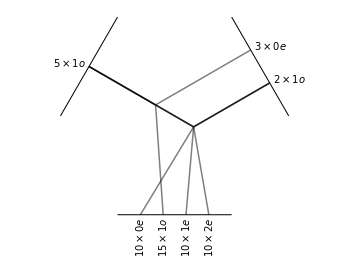

In [13]:
t = e3nn.o3.FullTensorProduct("5x1o", "3x0e + 2x1o")

t.visualize()

After tensor product the resulting irreducible representations will again be stored in vector format which makes it easier for subsequent operations such as symmetric transformations or tensor products:

In [14]:
import torch

# Feed tp with some data
for ireps in ['0e', '1e', '2e']:
    tp = e3nn.o3.FullTensorProduct("1o", "1o",[ireps])
    x1 = torch.tensor([1.0, 0.0, 0.0])
    x2 = torch.tensor([0.0, 1.0, 0.0])

    print("Irrep {}: {}".format(ireps, tp(x1, x2)))
    
tp = e3nn.o3.FullTensorProduct("1o", "1o")
print("Final irrep vector 0e + 1e + 2e: {}".format(tp(x1, x2)))

Irrep 0e: tensor([0.])
Irrep 1e: tensor([0.0000, 0.0000, 0.7071])
Irrep 2e: tensor([0.0000, 0.7071, 0.0000, 0.0000, 0.0000])
Final irrep vector 0e + 1e + 2e: tensor([0.0000, 0.0000, 0.0000, 0.7071, 0.0000, 0.7071, 0.0000, 0.0000, 0.0000])


Next, we will explore how tensor product with weights can be implemented in e3nn as the parallel of a linear layer in MLPs.

As mentioned earlier, each independent ``paths`` inside a tensor product can be parametrized by constants, thus these parameters can be updated through back-propagation during training process in the similar fashion as those in MLPs.

An example of the weighted tensor product (or fully connected tensor product layer) with random initial weights is shown below:

Parameter containing:
tensor([ 1.4761, -0.6806, -0.1231, -0.4660,  0.8056, -0.6972,  0.0231, -0.8141,
         0.1462, -1.1039, -1.0309,  0.4627], requires_grad=True)

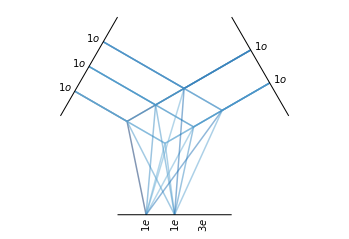

In [15]:
# Tensor product with weights
tp1 = e3nn.o3.FullyConnectedTensorProduct("1o + 1o + 1o", "1o + 1o", "1e + 1e + 3e")
tp1.visualize(plot_weight=True)
tp1.weight

As discussed in section ``Irreducible representations``, a 3x3 matrix (tensor product between two $l=1$ representations) decomposes in $l=0$, $l=1$ and $l=2$ representations which can be represented by spherical harmonics. 

More generally, spherical harmonics can be obtained from the sucessive application of tensor products as seen in Fig. 1[1]:

| ![square](figs/tp.png) |
|:--:|
| <b>Fig.1 - Successive application of tensor products.</b>|


``e3nn`` allows you to select the l-order output of the tensor product. We can thus recover the spherical harmonics:

In [16]:
import torch
import math
from e3nn import o3
import plotly.graph_objects as go

axis = dict(
    showbackground=False,
    showticklabels=False,
    showgrid=False,
    zeroline=False,
    title='',
    nticks=3,
)

layout = dict(
    width=690,
    height=160,
    scene=dict(
        xaxis=dict(
            **axis,
            range=[-8, 8]
        ),
        yaxis=dict(
            **axis,
            range=[-2, 2]
        ),
        zaxis=dict(
            **axis,
            range=[-2, 2]
        ),
        aspectmode='manual',
        aspectratio=dict(x=8, y=2, z=2),
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=0, y=-5, z=5),
            projection=dict(type='orthographic'),
        ),
    ),
    paper_bgcolor="rgba(0,0,0,0)",
    plot_bgcolor="rgba(0,0,0,0)",
    margin=dict(l=0, r=0, t=0, b=0)
)


def s2_grid():
    betas = torch.linspace(0, math.pi, 40)
    alphas = torch.linspace(0, 2 * math.pi, 80)
    beta, alpha = torch.meshgrid(betas, alphas, indexing='ij')
    return o3.angles_to_xyz(alpha, beta)

def trace(r, f, c, radial_abs=True):
    if radial_abs:
        a = f.abs()
    else:
        a = 1
    return dict(
        x=a * r[..., 0] + c[0],
        y=a * r[..., 1] + c[1],
        z=a * r[..., 2] + c[2],
        surfacecolor=f
    )

def plot(data, radial_abs=True):
    r = s2_grid()
    n = data.shape[-1]
    traces = [
        trace(r, data[..., i], torch.tensor([2.0 * i - (n - 1.0), 0.0, 0.0]), radial_abs=radial_abs)
        for i in range(n)
    ]
    cmax = max(d['surfacecolor'].abs().max().item() for d in traces)
    traces = [go.Surface(**d, colorscale='RdYlBu', cmin=-cmax, cmax=cmax) for d in traces]
    fig = go.Figure(data=traces, layout=layout)
    fig.show()
    return fig

In [17]:
r = s2_grid()
tp = o3.ElementwiseTensorProduct("1o", "1o", ['2e'], irrep_normalization='norm')
y2 = tp(r, r)
fig = plot(y2)

In [18]:
tp = o3.ElementwiseTensorProduct("2e", "1o", ['3o'], irrep_normalization='norm')
y3 = tp(y2, r)
fig = plot(y3)

## References
1. Geiger, Mario, and Tess Smidt. "e3nn: Euclidean neural networks." arXiv preprint arXiv:2207.09453 (2022).